In [31]:
import sys
import pandas as pd
import sklearn
import matplotlib
import seaborn
import numpy as np
print(sys.version)
print(pd.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
1.1.3
3.3.2
0.11.0


In [32]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [33]:
df=pd.read_csv("games.csv")


In [34]:
print(df.columns)
print(df.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


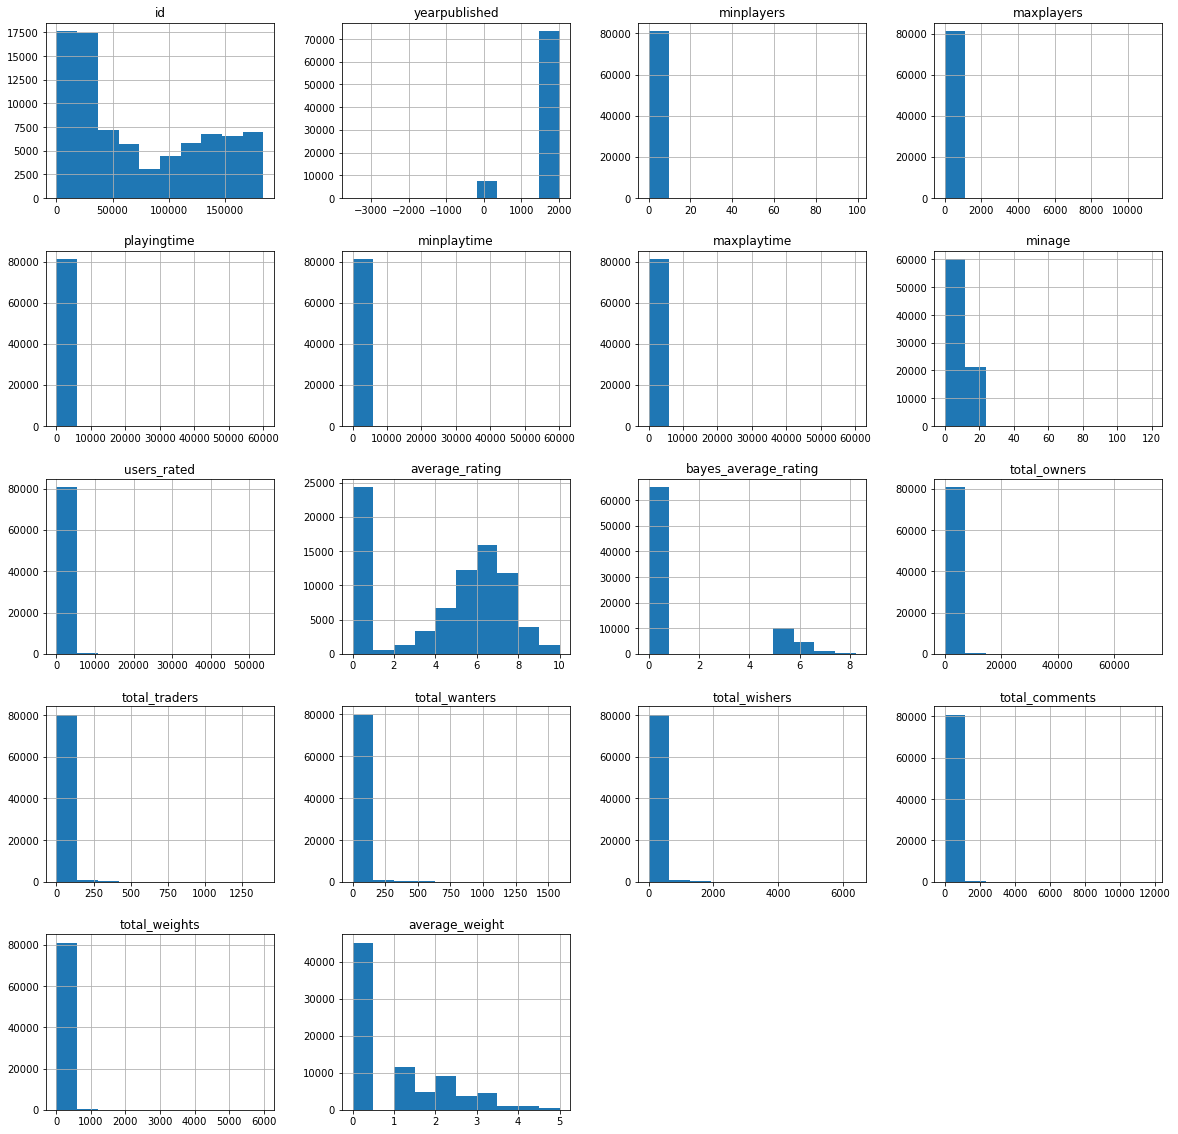

In [35]:
df.hist(figsize=(20,20))
plt.show()

In [36]:
print(df[df["average_rating"]==0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [37]:
df=df[df["users_rated"]>0]

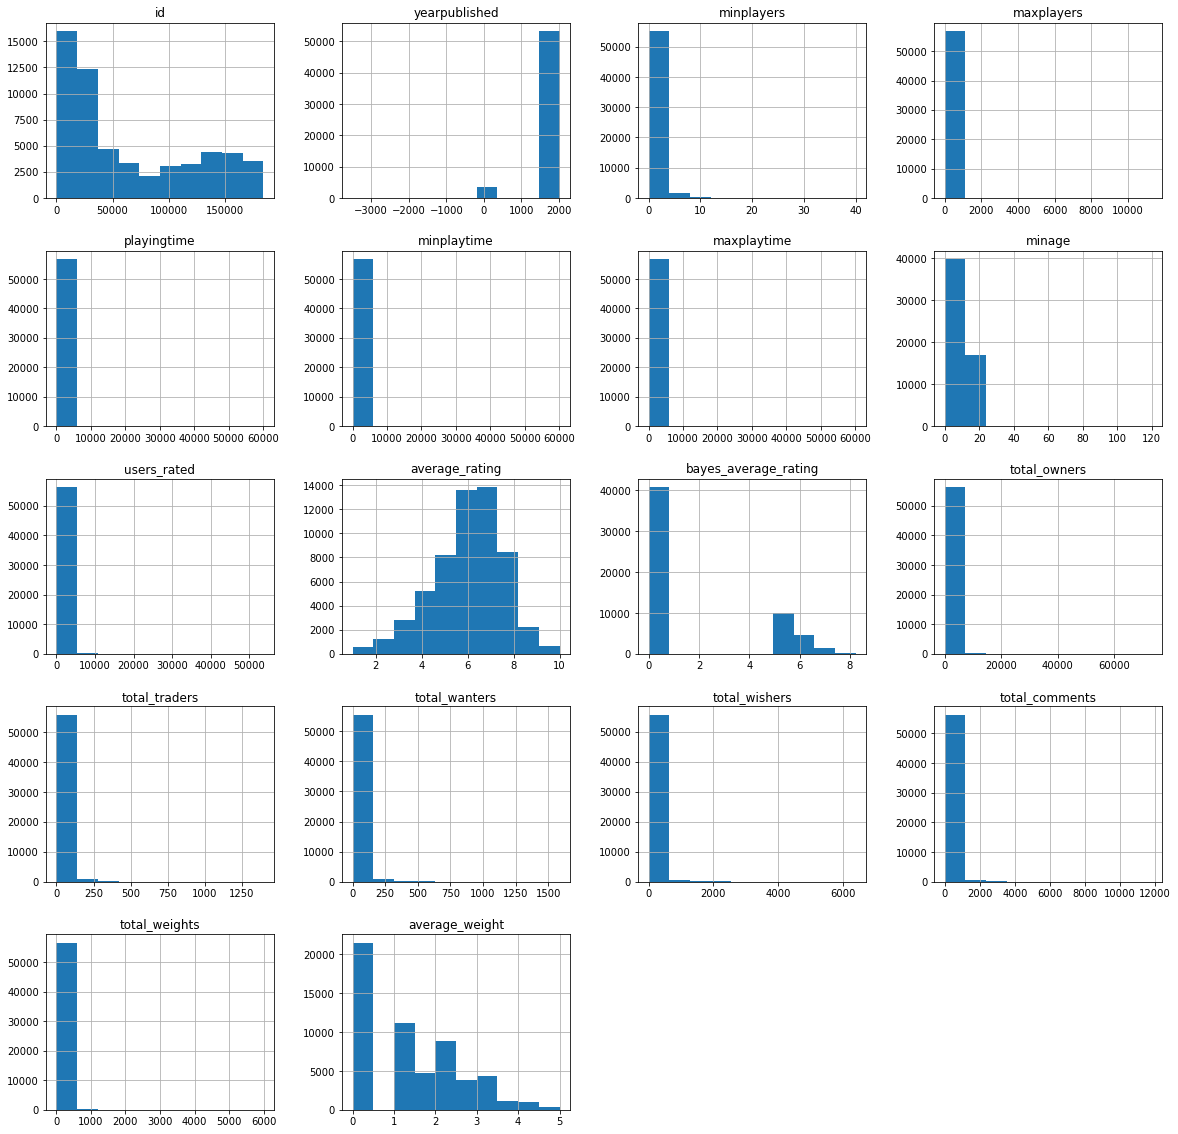

In [38]:
df=df.dropna(axis=0)
df.hist(figsize=(20,20))
plt.show()

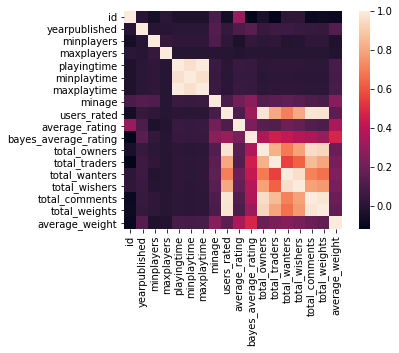

In [39]:
corrmat=df.corr()
sns.heatmap(corrmat,square="True")
plt.show()

In [48]:
z=df.columns.tolist()
z=[i for i in z if i not in ["id","bayes_average_rating","name","type"]]

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [50]:
LR=LinearRegression()

In [51]:
df=df[z]
X=np.array(df.drop(["average_rating"],1))
Y=np.array(df["average_rating"])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)
print(df.columns)

Index(['yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'total_owners', 'total_traders', 'total_wanters', 'total_wishers',
       'total_comments', 'total_weights', 'average_weight'],
      dtype='object')


In [52]:
LR.fit(X_train,Y_train)

LinearRegression()

In [53]:
predictions=LR.predict(X_test)
mean_squared_error(predictions,Y_test)

2.097142194085174

In [55]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=5)

In [56]:
RFR.fit(X_train,Y_train)


RandomForestRegressor(min_samples_leaf=5)

In [57]:
predictions=RFR.predict(X_test)
mean_squared_error(predictions,Y_test)

1.440629901763152